In [1]:
import pandas as pd
import numpy as np
# import umap
import umap.umap_ as umap
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/Users/ellaistep/Documents/4_ITC/1_Final_project/data/cleaned/features.csv')
target =  pd.read_csv('/Users/ellaistep/Documents/4_ITC/1_Final_project/data/cleaned/labels.csv')
df.shape, target.shape

((972, 152), (972, 2))

In [3]:
target = target.drop('ID', axis=1)
df = df.drop('ID', axis=1)

In [4]:
target.shape, df.shape

((972, 1), (972, 151))

In [5]:
target['label'].unique()

array(['8-Van', '5-Lem', '4-Rose', '6-Ger', '3-Ethyl', '2-Hex', '7-Cit',
       '1-Benz'], dtype=object)

In [6]:
dico = {'8-Van':8, '5-Lem':5, '4-Rose':4, '6-Ger':6, '3-Ethyl':3, '2-Hex':2, '7-Cit':7,
       '1-Benz':1}

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)

In [12]:
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(X_train_t)
embedding.shape

(651, 3)

In [58]:
y_train['label'].values.shape

(651,)

In [59]:
X_train.shape

(651, 151)

In [62]:
color_code = y_train['label'].map({'8-Van':8, '5-Lem':5, '4-Rose':4, '6-Ger':6, '3-Ethyl':3, '2-Hex':2, '7-Cit':7,
       '1-Benz':1})
color_code.array

<PandasArray>
[1, 1, 2, 8, 8, 1, 2, 5, 3, 2,
 ...
 2, 3, 5, 4, 3, 2, 7, 4, 6, 2]
Length: 651, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


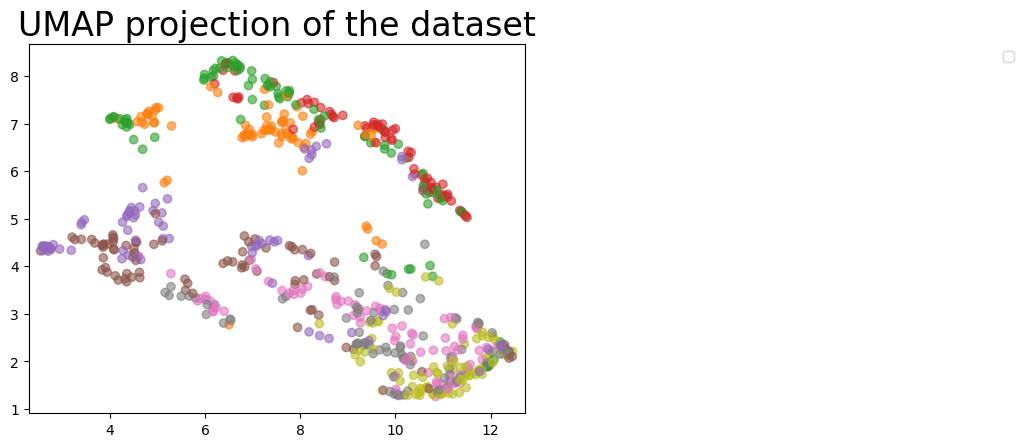

In [64]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_train['label'].map({'8-Van':8, '5-Lem':5, '4-Rose':4, '6-Ger':6, '3-Ethyl':3, '2-Hex':2, '7-Cit':7,
       '1-Benz':1}) ],
    alpha=0.6
)
plt.gca().set_aspect('equal', 'datalim')
plt.legend(loc='upper right',bbox_to_anchor=[2, 1])
plt.title('UMAP projection of the dataset', fontsize=24);

In [23]:
x = embedding[:, 0]
y = embedding[:, 1]
z = embedding[:, 2]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

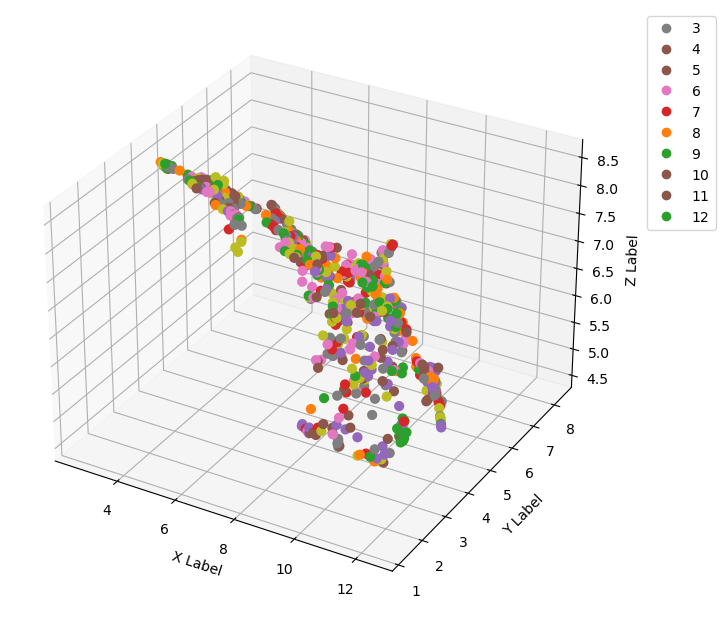

In [28]:



fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap([sns.color_palette()[x] for x in y_train['label'].map({'8-Van':8, '5-Lem':5, '4-Rose':4, '6-Ger':6, '3-Ethyl':3, '2-Hex':2, '7-Cit':7,
       '1-Benz':1}) ])

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)